# **Wellcome to PitArray**
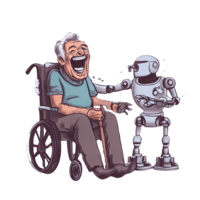

 **P**ark**I**nson's disease detection **T**ool using blood based micro**Array** data (**PitArray**)
*   🩸 It works on Blood based gene expression.

*   PitArray takes Robust Multi-array Average (RMA) normalized data as input (Details:https://bioconductor.org/packages/release/bioc/html/affy.html).

* Please upload your RMA normalized data using "**Step 1**: Upload Input File" in **.csv** format. Afterward, run every steps of this notebook to visualise the results.

## **Step 1:** : Input

In [ ]:
# Import required libraries
from google.colab import files
# Upload the CSV file from your local computer
uploaded = files.upload()

## **Step 2:** : Predict

In [ ]:
#Clone PitArray repository (PitArray.git) using git clone

!git clone https://github.com/Arittra95/PitArray.git

#Import numpy
import numpy as np
#Import pandas
import pandas as pd
#Import seaborn
import seaborn as sns
#Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import joblib

#Read the csv file

# Check the uploaded files
for filename in uploaded.keys():
    print(f'Uploaded file: {filename}')

# Assuming you want to read the first uploaded CSV file into a DataFrame
if uploaded:
    file_name = list(uploaded.keys())[0]  # Get the name of the first uploaded file
    df = pd.read_csv(file_name)
    print(f'File "{file_name}" has been successfully loaded into df.')
else:
    print('No CSV file was uploaded.')

#remove probe IDs by removing the first column
df = df.iloc[:, 1:]

#rename the first column as "sample_id"
df.rename(columns={df.columns[0]: 'sample_id'}, inplace=True)

#tranpose the data
transposed_df = df.transpose()
transposed_df.columns = transposed_df.iloc[0]
transposed_df = transposed_df[1:]

#Subset the selected features

# List of features to be selected
selected_genes = ['ABCA5', 'ANXA3', 'ARG1', 'ARL17A /// ARL17B', 'BTN3A2', 'CASC1',
       'COL9A3', 'DEFA4', 'DRD4', 'DSP', 'ENC1', 'FCGR1A',
       'FCGR1A /// FCGR1B /// FCGR1C', 'FKBP14', 'FOXD1', 'FPGT', 'GPX3',
       'GUSBP3 /// SMA4 /// SMA5', 'GYS2', 'HLA-DQA1', 'HS3ST3A1', 'IGJ',
       'IL18R1', 'KIR2DL3', 'KRT1', 'LARP6', 'LOC644172 /// MAPK8IP1', 'LRRN3',
       'MCTP1', 'MYH7B', 'NMBR', 'PCF11', 'PF4V1', 'POMZP3', 'PTGDS', 'RPS4Y1',
       'SCD5', 'SLFN12','TJP2', 'TUBB2A', 'XIST', 'XK']

# Filter the features from df DataFrame and create X
X = transposed_df[selected_genes].copy()

#Keep the unique gene names by averageing the expression values of any genes that have been detected by multiple probes
X = X.groupby(X.columns, axis=1).mean()

#Add 1 to each value just in case there is a 0 value
X = X + 1

#Peform log2 transformation of your data
X = np.log2(X)

#Save the sample names in a new variable

sample_ids = X.index.tolist()

# Scale x variable
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the x data
scaler.fit(X)

# Transform the x data
x_scaled = scaler.transform(X)

#Import the PitArray model
PitArray = joblib.load('PitArray/pitarray.v.1.0.joblib')

#Run PitArray
PitArray_predictions = PitArray.predict(x_scaled)

#Convert the results of PitArray predictions from an array to a dataframe
PitArray_predictions = pd.DataFrame({'Predictions': PitArray_predictions})

#Add the sample_id column based on the sample_ids stored in the previously stored sample_ids variable
PitArray_predictions['sample_id'] = sample_ids

#Move the sample_id column to the first position
PitArray_predictions = PitArray_predictions[['sample_id'] + [col for col in PitArray_predictions.columns if col != 'sample_id']]

#Denote 0.0 as PD not suspected and 1.0 as PD suspected
PitArray_predictions['Predictions'] = PitArray_predictions['Predictions'].map({0.0: 'PD not suspected', 1.0: 'PD suspected'})

## **Step 3:** : Visualize the Output

In [ ]:
PitArray_predictions

## **Step 4:** : Save the Output

In [ ]:
# Specify the file path where you want to save the .csv file in Colab
csv_file_path = '/content/PitArray_predictions.csv'

# Save the DataFrame as a .csv file
PitArray_predictions.to_csv(csv_file_path, index=False)

# Download the .csv file to your local machine
from google.colab import files
files.download(csv_file_path)